<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/kaggle_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Use seaborn for the correlation heatmap
!pip install seaborn

In [0]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Time related libraries
import time

In [2]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#Unzipping if needed
!unzip creditcard.zip

In [3]:
#read file & check the upload
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_shape = df.shape
print(data_shape)

(891, 12)


In [5]:
#data cleaning & exploration
unknown_count = df.isna().sum().drop_duplicates()
unknown_count[unknown_count>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
measurements = df.select_dtypes(include=[np.number])
categories = df.select_dtypes(exclude=[np.number])
list(measurements.columns)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [0]:
av_age = measurements['Age'].mean()
measurements['Age'].fillna(av_age)

In [0]:
# CORRELATIONS

# Correlation Plots
# Parameters
THRESHOLD = 0.7 # Correlation Coefficient Threshold of Interest
#printing formats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sample to calculate correlations (using filtered set of column, run exlusion calculation first)
#df_model1_sample = measurements_filtered.sample(frac=0.3, random_state=42)
df_sample = measurements.sample(frac=0.3, random_state=42)

start = time.time()

# Correlations, positive and negative. Round to 2 decimals and filling NaN with O
df_corr = round(df_sample.corr(),6).fillna(0)

print("CORRELATION MATRIX")
#print(df_corr.drop(['PassengerId'], axis = 1).drop(['PassengerId'], axis = 0))
print(df_corr)
column_list = list(df_corr.columns)
column_set = set()
n_col = len(column_list)

corr_ranking=[] # initializing array of highly correlated pairs
for i in range(n_col-1):
  for j in range(i):
    if abs(df_corr.values[j][i]) > 0.2:
      temp=df_corr.values[j][i], column_list[i],column_list[j]
      corr_ranking.append(temp)
print (corr_ranking)
# selecting subset of columns for plotting:
for item in corr_ranking:
  column_set.add(item[1])
  column_set.add(item[2])
print(column_set)
df_corr_plot = round(df_sample[list(column_set)].corr(),6).fillna(0)
print(df_corr_plot)
print("Running time in seconds =", time.time() - start)

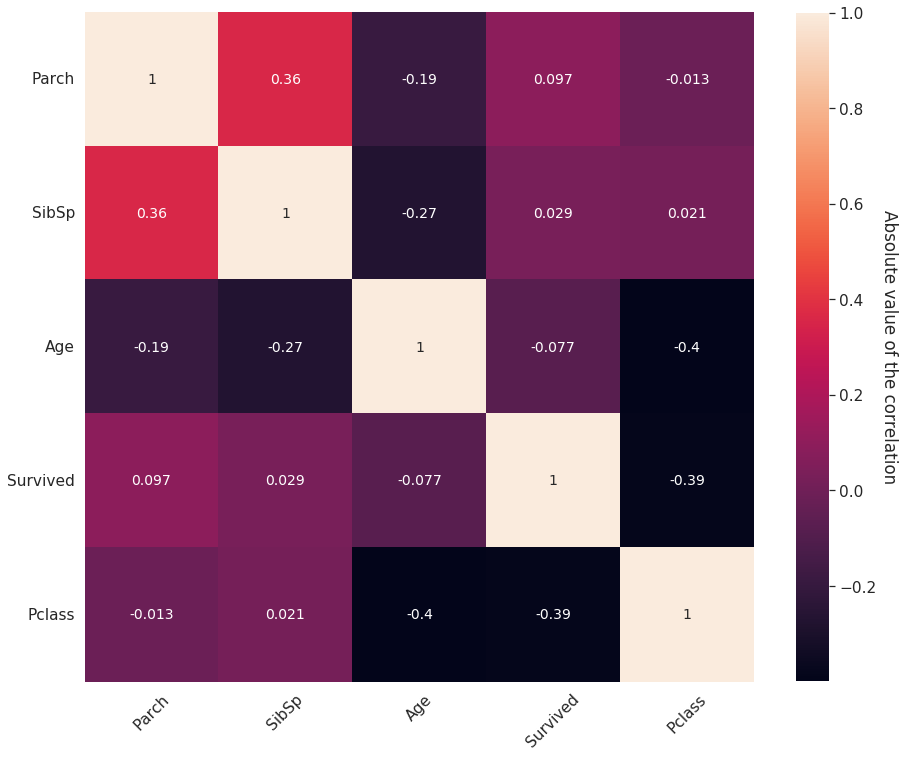

In [39]:
# HeatMap Using Seaborn
sns.set()
# this scales up all text, but does not affect annot (see annot_kws={'size':1.4})
sns.set(font_scale=1.4)
fig = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(0, 359, as_cmap=True)
# annot controls the correlation values display, bizarre shrink-value properly scales the colorbar 
ax = sns.heatmap(df_corr_plot, square=True, cbar_kws={'shrink': 0.82}, annot=True, annot_kws={'size': 14})
# take care of the labels printing
labels_list = df_corr_plot.columns
# this centers and prints horizontally the y labels
ax.set_yticklabels(labels_list, rotation=0, va='center')
# this rotates the x labels
ax.set_xticklabels(labels_list, rotation=45, va='top')
ax.collections[0].colorbar.set_label('Absolute value of the correlation', rotation=-90, va='bottom')
plt.show()